Q1 Make Trackbar for the following images to tune the parameters of canny
detection.

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

6
10
17
25
35
43
52
58
60
65
68
72
74
81
86
87
89
90
92
93
94
95
96
97
98
99
100
102
103
104
105
106
107
108
109
110
111
112
114
115
117
119
120
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
149
147
146
145
144
143
142
141
140
139
138
137
136
135
136
137
139
141
142
143
144
145
147
148
149
150
149
148
147
146
145
144
143
142
1
3
4
7
11
19
21
32
45
54
59
72
81
84
90
96
98
102
103
104
105
106
107
108
111
113
117
118
121
122
123
124
126
128
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
147
148
150
148
143
142
141
139
137
135
132
130
125
120
117
116
115
114
113
112
110
109
108
107
106
105
104
103
102
101
100
99
98
95
90
78
76
75
74
73
72
71
70
69
68
2
3
4
6
8
9
11
12
15
18
19
21
22
25
27
30
33
35
40
41
44
45
47
48
50
51
53
54
57
58
59
60
61
62
63
64
65
66
67
68
69
71
72
73
74
75
77
79
80
82
86
88
89
92
94
96
97
100
103
104
105
106
108
109
110
111
112
113
114
115
117
118
119
120
121
122
123
124
125
126
127
1

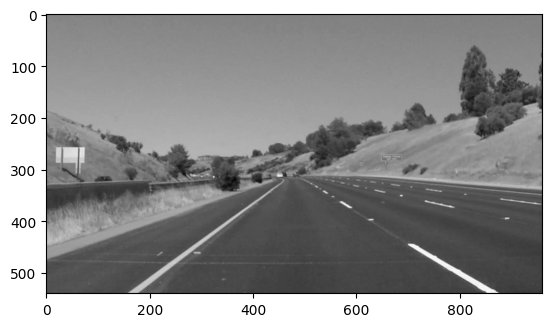

In [8]:

def nothing(x):
    print(x)

def convert_to_gray(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img1 = cv2.imread('solidWhiteCurve.jpg')
gray_1 = convert_to_gray(img1)
plt.imshow(gray_1, cmap='gray');  

img2 = cv2.imread('solidYellowCurve2.jpg')
gray_2 = convert_to_gray(img2)
plt.imshow(gray_2, cmap='gray');  

def find_edges(img,threshold_1,threshold_2):
  blur = cv2.GaussianBlur(img, (5,5), 0)
  return cv2.Canny(blur, threshold_1,threshold_2)

cv2.namedWindow('image 1')
cv2.namedWindow('image 2')

cv2.createTrackbar('threshold_1', 'image 1', 0, 150, nothing)
cv2.createTrackbar('threshold_2', 'image 1', 0, 150, nothing)
cv2.createTrackbar('threshold_1', 'image 2', 0, 150, nothing)
cv2.createTrackbar('threshold_2', 'image 2', 0, 150, nothing)
while 1:
    t1_img1 = cv2.getTrackbarPos('threshold_1', 'image 1')
    t2_img1 = cv2.getTrackbarPos('threshold_2', 'image 1')
    t1_img2 = cv2.getTrackbarPos('threshold_1', 'image 2')
    t2_img2 = cv2.getTrackbarPos('threshold_2', 'image 2')
    
    img1_edged = find_edges(img1, t1_img1, t2_img1)
    img2_edged = find_edges(img2, t1_img2, t2_img2)
    
    cv2.imshow('image 1', img1_edged)
    cv2.imshow('image 2', img2_edged)
    
    k = cv2.waitKey(1)
    if k == ord('q'):
        print('You closed all windows')
        break

cv2.destroyAllWindows() 

Q2 The out of question 1 make it as input for question 2 after make region of
interest then make trackbar for houghlines parameters (threshold ,min_line_length
max_line_gap
 and then draw 2 line on image.

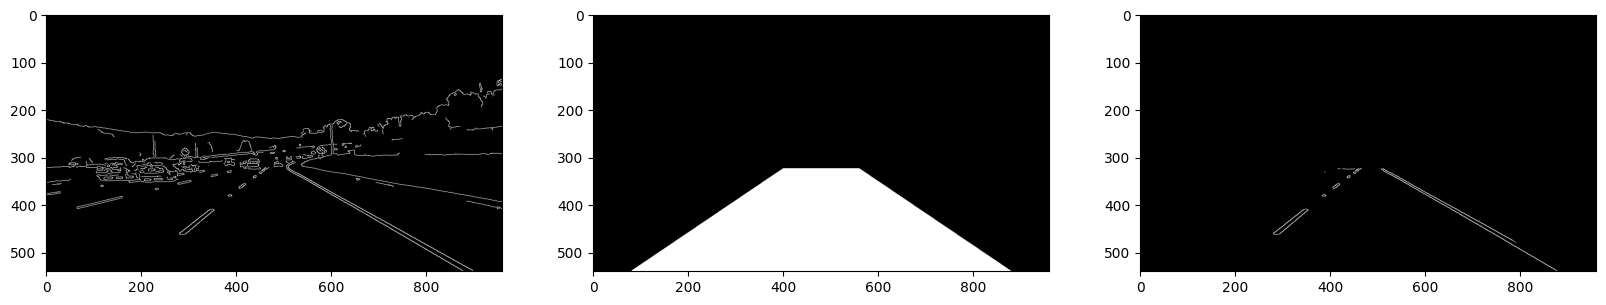

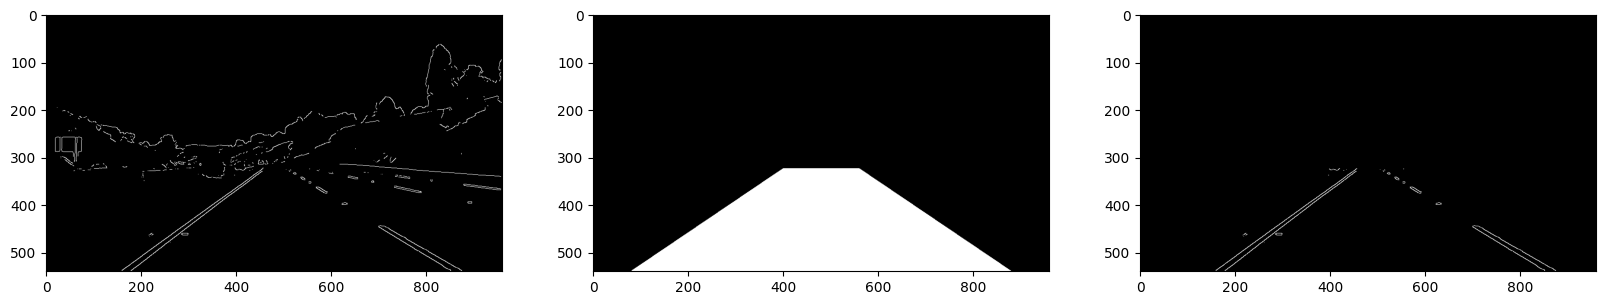

In [9]:

mask_1 = np.zeros_like(img1_edged)
vert = np.array(
  [
    [
      (int(mask_1.shape[1]*5/12), int(mask_1.shape[0]*3/5)),
      (int(mask_1.shape[1]*7/12), int(mask_1.shape[0]*3/5)),
      (int(mask_1.shape[1]*11/12), mask_1.shape[0]),
      (int(mask_1.shape[1]/12), mask_1.shape[0])
    ]
  ]
)
cv2.fillPoly(mask_1, vert, 255)
masked_1 = cv2.bitwise_and(img1_edged, mask_1)

fig1, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 10))
ax0.imshow(img1_edged, cmap='gray')
ax1.imshow(mask_1, cmap='gray')
ax2.imshow(masked_1, cmap='gray');

mask_2 = np.zeros_like(img2_edged)
vert = np.array(
  [
    [
      (int(mask_2.shape[1]*5/12), int(mask_2.shape[0]*3/5)),
      (int(mask_2.shape[1]*7/12), int(mask_2.shape[0]*3/5)),
      (int(mask_2.shape[1]*11/12), mask_2.shape[0]),
      (int(mask_2.shape[1]/12), mask_2.shape[0])
    ]
  ]
)
cv2.fillPoly(mask_2, vert, 255)
masked_2 = cv2.bitwise_and(img2_edged, mask_1)

fig2, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 10))
ax0.imshow(img2_edged, cmap='gray')
ax1.imshow(mask_2, cmap='gray')
ax2.imshow(masked_2, cmap='gray');



In [10]:
def mask_roi(img):
  mask = np.zeros_like(img1_edged)

  vert = np.array(
    [
      [
        (int(mask.shape[1]*5/12), int(mask.shape[0]*3/5)),
        (int(mask.shape[1]*7/12), int(mask.shape[0]*3/5)),
        (int(mask.shape[1]*11/12), mask.shape[0]),
        (int(mask.shape[1]/12), mask.shape[0])
      ]
    ]
  )
  cv2.fillPoly(mask, vert, 255)
  masked = cv2.bitwise_and(img1_edged, mask)
  return masked

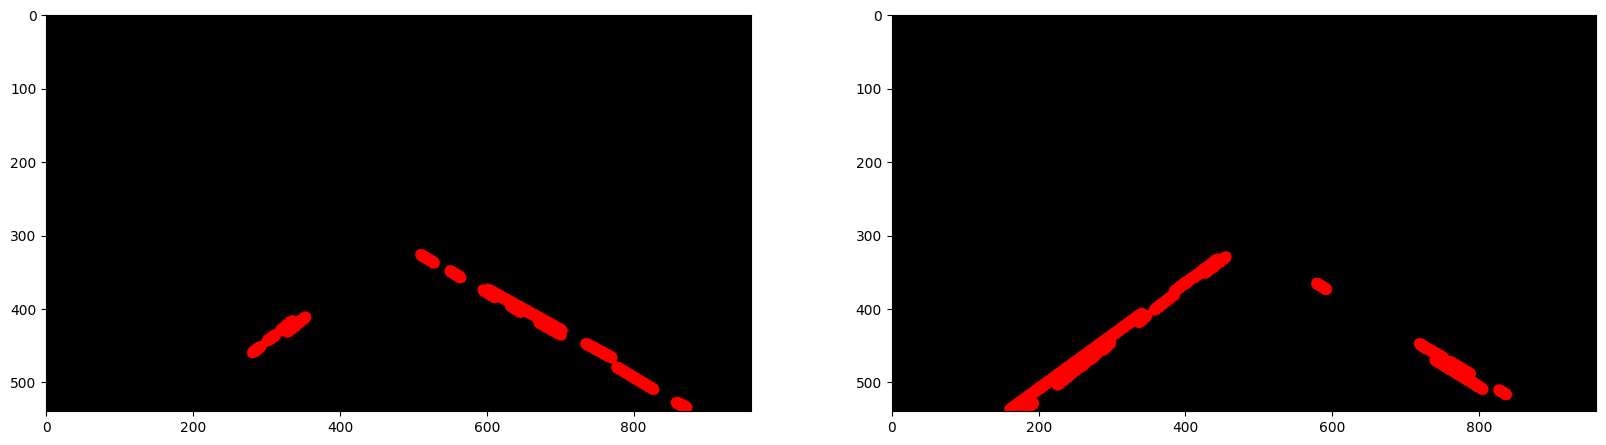

In [11]:
def hough_lines(img):
  return cv2.HoughLinesP(img, 4, np.pi/180, 10, 5, 10)

def draw_lines(img, lines):
  lines_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
  for line in lines:
    for x1,y1,x2,y2 in line:
      cv2.line(lines_img, (x1, y1), (x2, y2), [255,0,0], 15)
  return lines_img

lines_1 = hough_lines(masked_1)
lined_img_1 = draw_lines(masked_1, lines_1)

lines_2 = hough_lines(masked_2)
lined_img_2 = draw_lines(masked_2, lines_2)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))
ax0.imshow(lined_img_1, cmap='gray')
ax1.imshow(lined_img_2, cmap='gray')



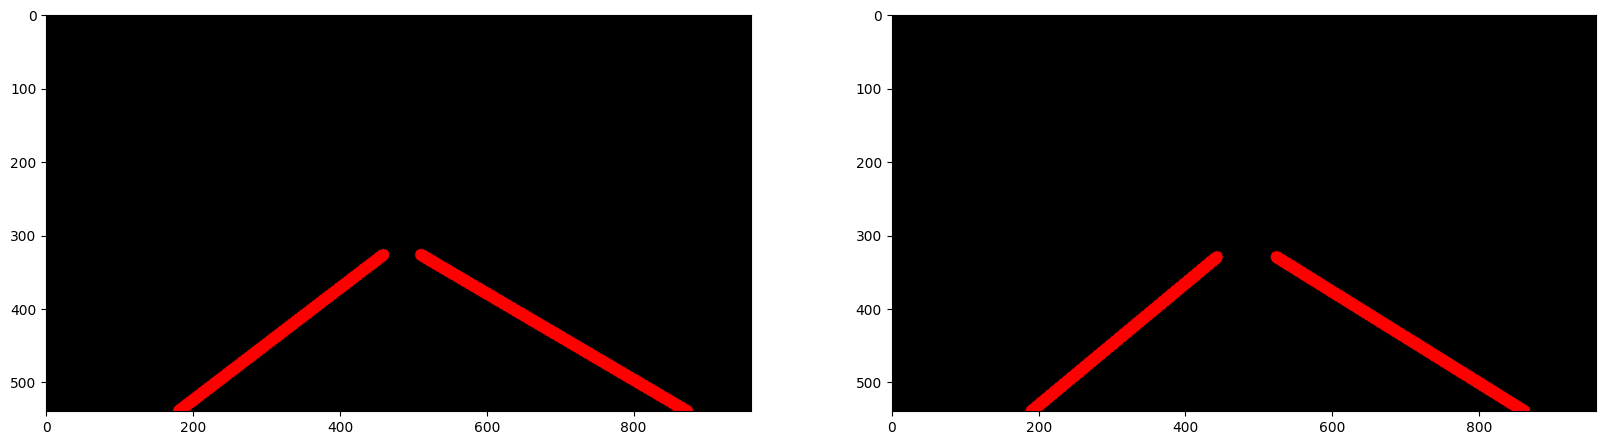

In [12]:
def formulate_lanes(lines, img):
  negative_slopes = []
  positive_slopes = []

  negative_intercepts = []
  positive_intercepts = []

  y_min = img.shape[0]
  y_max = img.shape[0]

  for line in lines:
    for x1, y1, x2, y2 in line:
      slope = (y2-y1) / (x2-x1)
      intercept = y2 - slope*x2

      y_min = min(y_min, y1, y2)

      if slope > 0.0:
        positive_slopes.append(slope)
        positive_intercepts.append(intercept)

      elif slope < 0.0:
        negative_slopes.append(slope)
        negative_intercepts.append(intercept)
  
  positive_slope = np.mean(positive_slopes)
  negative_slope = np.mean(negative_slopes)

  positive_intercept = np.mean(positive_intercepts)
  negative_intercept = np.mean(negative_intercepts)
  pts = [
    [[0,0, 0,0]],
    [[0,0, 0,0]]
  ]

  # +ve
  if len(positive_slopes) > 0:
    x_max = (y_max - positive_intercept) / positive_slope
    x_min = (y_min - positive_intercept) / positive_slope
    pts[0][0] = [x_min, y_min, x_max, y_max]
  
  if len(negative_slopes) > 0:
    x_max = (y_max - negative_intercept) / negative_slope
    x_min = (y_min - negative_intercept) / negative_slope
    pts[1][0] = [x_min, y_min, x_max, y_max]
  
  return np.array(pts, dtype=np.int32)

lane_1 = formulate_lanes(lines_1, masked_1)
lane_2 = formulate_lanes(lines_2, masked_1)

lanes_img1 = draw_lines(masked_1, lane_1)
lanes_img2 = draw_lines(masked_2, lane_2)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))
ax0.imshow(lanes_img1, cmap='gray')
ax1.imshow(lanes_img2, cmap='gray')


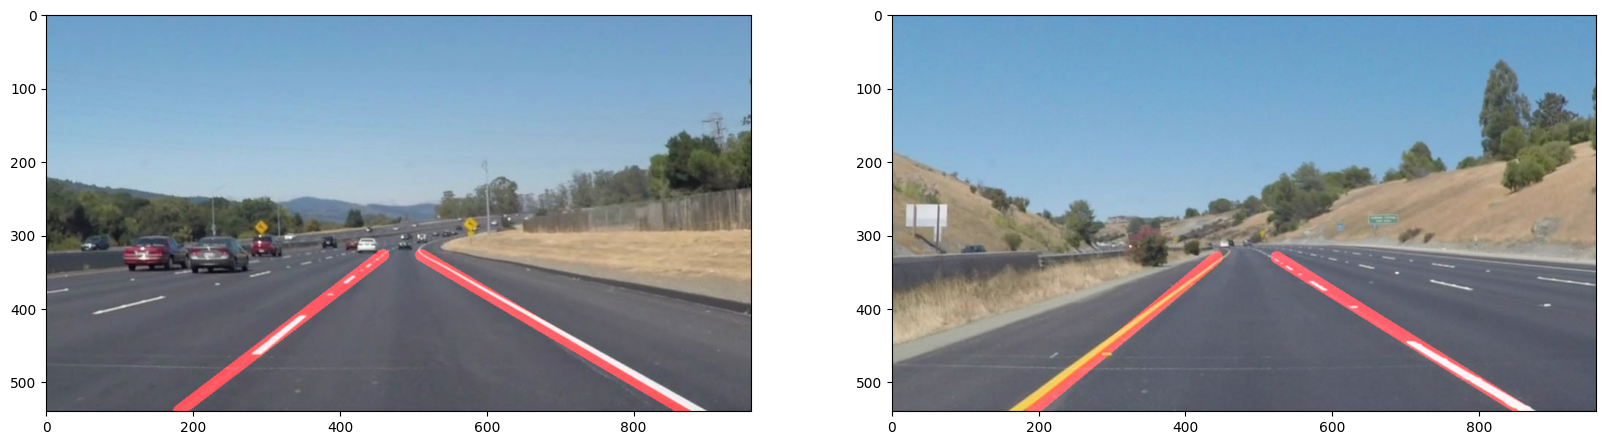

In [13]:
output_1 = cv2.addWeighted(img1[:,:,::-1], 1, lanes_img1, 1, 0)
output_2 = cv2.addWeighted(img2[:,:,::-1], 1, lanes_img2, 1, 0)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))
ax0.imshow(output_1)
ax1.imshow(output_2)


Q3 read the following video and apply lane line detection on it then show output
using opencv.

In [15]:

from IPython.display import HTML

input_path = 'solidWhiteRight.mp4 - Google Drive.mp4'
output_path = 'solidWhiteRight.mp4 - output.mp4'

HTML(f"""
     <video width="960" height="540" controls>
      <source src="{input_path}">
     </ video>
""")

In [18]:
from moviepy.editor import VideoFileClip
def process_image(img):
    gray = convert_to_gray(img)
    edges = find_edges(gray, t1_img1, t2_img1)
    masked = mask_roi(edges)
    lines = hough_lines(masked)
    lanes = formulate_lanes(lines, masked)
    lined_img = draw_lines(masked, lanes)

    # Resize the lined_img to match the size of img
    lined_img = cv2.resize(lined_img, (img.shape[1], img.shape[0]))

    output = cv2.addWeighted(img, 1, lined_img, 1, 0)
    return output

input_video = VideoFileClip(input_path)
output_video = input_video.fl_image(process_image)
output_video.write_videofile(output_path, audio=False)
HTML(f"""
     <video width="540" height="540" controls>
      <source src="{output_path}">
     </ video>
""")

Moviepy - Building video solidWhiteRight.mp4 - output.mp4.
Moviepy - Writing video solidWhiteRight.mp4 - output.mp4



Moviepy - Done !
Moviepy - video ready solidWhiteRight.mp4 - output.mp4
